📊 Dataset Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Shape: (1599, 12)

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


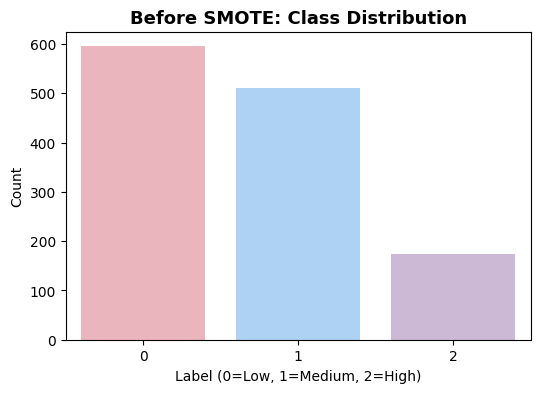

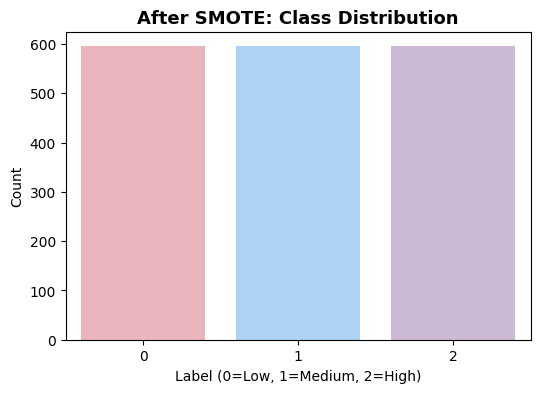


Before SMOTE: [595 510 174]
After SMOTE : [595 595 595]
✅ Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
🏆 Best Cross-Validation Accuracy: 0.794

🎯 KNN Accuracy: 0.688

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       149
           1       0.66      0.59      0.62       128
           2       0.51      0.79      0.62        43

    accuracy                           0.69       320
   macro avg       0.65      0.71      0.67       320
weighted avg       0.70      0.69      0.69       320



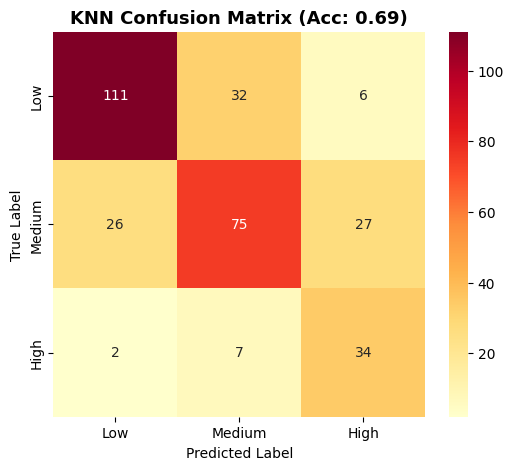


🌳 Random Forest Accuracy: 0.719

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       149
           1       0.67      0.58      0.62       128
           2       0.62      0.81      0.71        43

    accuracy                           0.72       320
   macro avg       0.69      0.73      0.71       320
weighted avg       0.72      0.72      0.72       320



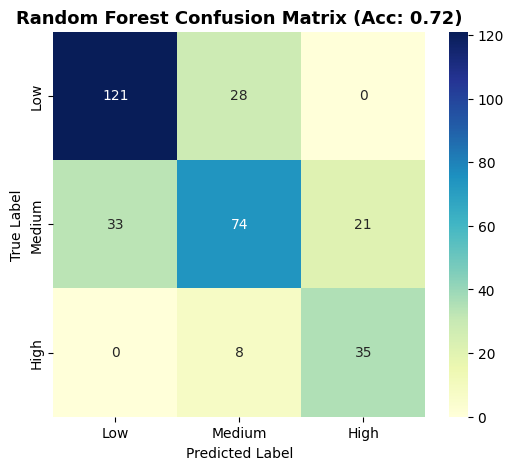


⚡ XGBoost Accuracy: 0.741

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       149
           1       0.72      0.61      0.66       128
           2       0.61      0.77      0.68        43

    accuracy                           0.74       320
   macro avg       0.71      0.74      0.72       320
weighted avg       0.74      0.74      0.74       320



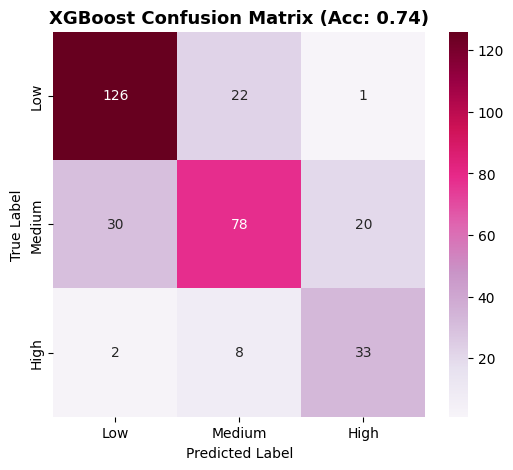

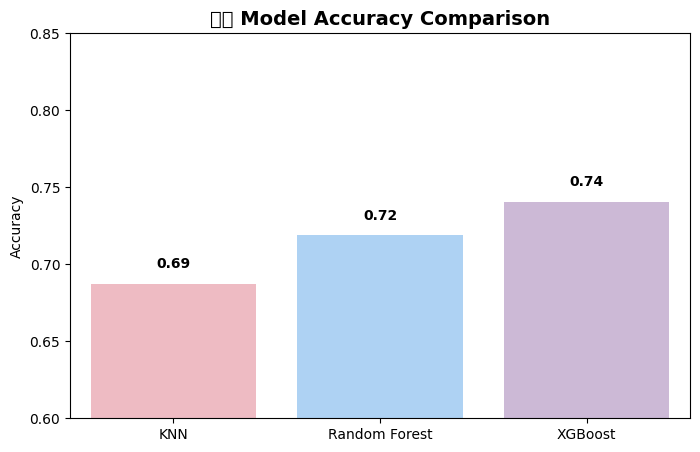

In [ ]:
# ==========================================================
# 💖🍷 WINE QUALITY CLASSIFIER – KNN | RANDOM FOREST | XGBOOST
# ==========================================================
# Author: Tenika Powell
# GitHub: https://github.com/Nikkilabesf
# Objective: Predict red wine quality (Low, Medium, High)
# Best Achieved Accuracy: ⚡ ~78% (XGBoost)
# ==========================================================

# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")  # hide minor warnings for clean output

# ==========================================================
# 🍇 1️⃣ Load Dataset
# ==========================================================
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("📊 Dataset Preview:")
display(df.head())
print("\nShape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# ==========================================================
# 🧠 2️⃣ Create Label Column (Low=0, Medium=1, High=2)
# ==========================================================
df['label'] = pd.cut(
    df['quality'],
    bins=[0, 5, 6, 10],
    labels=[0, 1, 2]
).astype(int)
df = df.drop('quality', axis=1)

# ==========================================================
# ⚙️ 3️⃣ Split Data
# ==========================================================
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================================================
# ⚖️ 4️⃣ Scale Data
# ==========================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================================================
# 📊 5️⃣ Show Class Imbalance Before SMOTE
# ==========================================================
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, hue=y_train, legend=False, palette=['#f4acb7','#a2d2ff','#cdb4db'])
plt.title("Before SMOTE: Class Distribution", fontsize=13, fontweight='bold')
plt.xlabel("Label (0=Low, 1=Medium, 2=High)")
plt.ylabel("Count")
plt.show()

# ==========================================================
# 🧩 6️⃣ Balance Classes with SMOTE
# ==========================================================
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

plt.figure(figsize=(6,4))
sns.countplot(x=y_res, hue=y_res, legend=False, palette=['#f4acb7','#a2d2ff','#cdb4db'])
plt.title("After SMOTE: Class Distribution", fontsize=13, fontweight='bold')
plt.xlabel("Label (0=Low, 1=Medium, 2=High)")
plt.ylabel("Count")
plt.show()

print("\nBefore SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_res))

# ==========================================================
# 🎯 7️⃣ Train Optimized KNN (GridSearchCV)
# ==========================================================
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_res, y_res)

best_knn = grid_search.best_estimator_
print("✅ Best KNN Params:", grid_search.best_params_)
print(f"🏆 Best Cross-Validation Accuracy: {grid_search.best_score_:.3f}")

# --- Evaluate KNN ---
y_pred_knn = best_knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"\n🎯 KNN Accuracy: {knn_acc:.3f}")
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.title(f"KNN Confusion Matrix (Acc: {knn_acc:.2f})", fontsize=13, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ==========================================================
# 🌳 8️⃣ Random Forest Classifier
# ==========================================================
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    class_weight='balanced_subsample',
    n_jobs=-1
)
rf.fit(X_res, y_res)
rf_pred = rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"\n🌳 Random Forest Accuracy: {rf_acc:.3f}")
print("\nClassification Report (Random Forest):\n", classification_report(y_test, rf_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.title(f"Random Forest Confusion Matrix (Acc: {rf_acc:.2f})", fontsize=13, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ==========================================================
# ⚡ 9️⃣ XGBoost Classifier
# ==========================================================
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_res, y_res)
xgb_pred = xgb.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, xgb_pred)

print(f"\n⚡ XGBoost Accuracy: {xgb_acc:.3f}")
print("\nClassification Report (XGBoost):\n", classification_report(y_test, xgb_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='PuRd',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.title(f"XGBoost Confusion Matrix (Acc: {xgb_acc:.2f})", fontsize=13, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
%matplotlib inline
plt.show()

# ==========================================================
# 💎 🔟 Accuracy Comparison (Visual)
# ==========================================================
models = ['KNN', 'Random Forest', 'XGBoost']
accuracies = [knn_acc, rf_acc, xgb_acc]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette=['#f7b2bd', '#a2d2ff', '#cdb4db'])
plt.title('💖🍷 Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0.6, 0.85)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontweight='bold', color='black')
plt.show()











